# **Naive Bayes**

The Naive Bayes classification algorithm has been in use for a very long time, particularly in applications that require classification of texts. It is a probabilistic algorithm based on the popular Conditional Probability and Bayes Theorem

##**The Bayes Theorem**

The Bayes theorem has various applications in Machine Learning, categorizing a mail as spam or important is one simple and very popular application of the Bayes classification.

One of the simplest definitions of the Bayes Theorem is that it describes the probability of an event, based on prior knowledge of conditions that might be related to the event.

The theorem is mathematically expressed as :

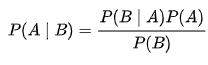

Where **A**and **B** are events and **P(B)** is never zero :

**P(A|B)** is the likelihood of event **A** occurring given that **B** is true.

**P(B|A)** is the likelihood of event **B** occurring given that **A** is true.

**P(A)** and **P(B)** are the probabilities of observing **A** and **B** independently of each other.

Click [here](https://analyticsindiamag.com/what-is-a-naive-bayes-classifier-and-what-significance-does-it-have-for-ml/) for more explanation and examples.

## **Lets Code!**

### **Getting the train_dataset**

In the following code section, we will use a classification train_dataset from [Machinehack’s Predict The train_data Scientists Salary In India](https://machinehack.com/hackathons/predict_the_train_data_scientists_salary_in_india_hackathon/) Hackathon.

To get the train_dataset, head to Machinehack, Sign up, start the hackathon and download the train_dataset from the hackathons page

In [ ]:
!python -m pip install pip --upgrade --user -q 
!python -m pip install numpy pandas seaborn matplotlib scipy statsmodels sklearn --user -q

In [ ]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

In [ ]:
import pandas as pd
#Load train train_data
train_data = pd.read_csv("Naive_Bayes_Final_Train_Dataset.csv")
train_data = train_data[['company_name_encoded','experience', 'location', 'salary']]


#Load Test train_data
test_data = pd.read_csv("Naive_Bayes_Final_Test_Dataset.csv")
test_data = test_data[['company_name_encoded','experience', 'location']]

In [ ]:
train_data

In [ ]:
test_data

### **Exploring The Training train_dataset**


In [ ]:
print("#"*30)
print("\nFeatures/Columns : \n", train_data.columns)
print("#"*30)
print("\n\nNumber of Features/Columns : ", len(train_data.columns))
print("#"*30)
print("\nNumber of Rows : ",len(train_data))
print("#"*30)
print("\n\nData Types :\n", train_data.dtypes)
print("#"*30)
print("\nContains NaN/Empty cells : ", train_data.isnull().values.any())
print("#"*30)
print("\nTotal empty cells by column :\n", train_data.isnull().sum(), "\n\n")
print("#"*30)
print("\n\nNumber of Unique Locations : ", len(train_data['location'].unique()))
print("#"*30)
print("\n\nNumber of Unique Salaries : ", len(train_data['salary'].unique()))
print("#"*30)
print("\n\nUnique Salaries:\n", train_data['salary'].unique())
print("#"*30)

The above code block is to help us understand the kind of data we are dealing with such as the number of records or samples, number of features, presence of missing values, unique classes etc

### **Cleaning The training Data**

Now let us clean up the training data.

We can see that the experiences are given in strings, so lets convert them to integers in a logical way by splitting it in to minimum experience (minimum_exp)  and maxim experience (maximum_exp).Also we will label encode the categorical features location and salary. We will then delete the original experience column, attach the new ones.

In [ ]:
#Cleaning the experience
exp = list(train_data.experience)
min_ex = []
max_ex = []

for i in range(len(exp)):
  exp[i] = exp[i].replace("yrs","").strip()
  min_ex.append(int(exp[i].split("-")[0].strip()))
  max_ex.append(int(exp[i].split("-")[1].strip()))
#Label encoding location and salary
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data['location'] = le.fit_transform(train_data['location'])
train_data['salary'] = le.fit_transform(train_data['salary'])

#Attaching the new experiences to the original dataset
train_data["minimum_exp"] = min_ex
train_data["maximum_exp"] = max_ex

#Deleting the original experience column and reordering
train_data.drop(['experience'], inplace = True, axis = 1)
train_data = train_data[['company_name_encoded', 'location','minimum_exp', 'maximum_exp', 'salary']]

After executing all the above code blocks our new dataset will look like this:

In [ ]:
train_data.head()

### **Cleaning the Testing Data**

In [ ]:
#Cleaning the experience
exp = list(test_data.experience)
min_ex = []
max_ex = []

for i in range(len(exp)):
  exp[i] = exp[i].replace("yrs","").strip()
  min_ex.append(int(exp[i].split("-")[0].strip()))
  max_ex.append(int(exp[i].split("-")[1].strip()))
#Label encoding location
test_data['location'] = le.fit_transform(test_data['location'])
#train_data['salary'] = le.fit_transform(train_data['salary'])

#Attaching the new experiences to the original dataset
test_data["minimum_exp"] = min_ex
test_data["maximum_exp"] = max_ex

#Deleting the original experience column and reordering
test_data.drop(['experience'], inplace = True, axis = 1)
test_data = test_data[['company_name_encoded', 'location','minimum_exp', 'maximum_exp']]

### **Feature Scaling of Training Data**

We will now scale all the numerical features in the dataset except the target variable which is salary(category).

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_data[['company_name_encoded', 'location', 'minimum_exp', 'maximum_exp']] = sc.fit_transform(train_data[['company_name_encoded', 'location', 'minimum_exp', 'maximum_exp']])

### **Feature Scaling of Testing Data**

In [ ]:
test_data[['company_name_encoded', 'location', 'minimum_exp', 'maximum_exp']] = sc.fit_transform(test_data[['company_name_encoded', 'location', 'minimum_exp', 'maximum_exp']])

### **Creating training and validation sets**

In [ ]:
#Splitting the dataset into  training and validation sets
from sklearn.model_selection import train_test_split
training_set, validation_set = train_test_split(train_data, test_size = 0.2, random_state = 21)
#classifying the predictors and target variables as X and Y
X_train = training_set.iloc[:,0:-1].values
Y_train = training_set.iloc[:,-1].values
X_val = validation_set.iloc[:,0:-1].values
y_val = validation_set.iloc[:,-1].values
X_test = test_data.values

### **Measuring the Accuracy**

We will use confusion matrix to determine the correct number of predictions. The accuracy is measured as the total number of correct predictions divided by the total number of predictions. We will define a function to calculate and return the accuracy

In [ ]:
def accuracy(confusion_matrix):
  diagonal_sum = confusion_matrix.trace()
  sum_of_all_elements = confusion_matrix.sum()
  return diagonal_sum / sum_of_all_elements

### **Initialising the Naive Bayes Classifier**

We now have all the data ready to be fitted to the Bayesian classifier. In the below code block we will initialize the Naive Bayes Classifier and fit the training data to it.

In [ ]:
#Importing the library
from sklearn.naive_bayes import GaussianNB
#Initializing the classifier
classifier = GaussianNB()
#Fitting the training data
classifier.fit(X_train, Y_train)

###**Predicting for the validation set**


The below code will store the predictions returned by the predict method into y_pred

In [ ]:
y_pred = classifier.predict(X_val)

Generating the confusion matrix and printing the accuracy

The below-given code block will generate a confusion matrix from the predictions and the actual values of the validation set for salary.


In [ ]:
#Generating the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)

print("__ACCURACY = ", accuracy(cm))

The Naive Bayesian classifier when fitted with the given data gave an accuracy of 38%.

### **Prediction on Test Set**

In [ ]:
y_test= classifier.predict(X_test)
y_test

Related Articles:


> * [Naive Bayes from Scratch](https://analyticsindiamag.com/understanding-naive-bayes-classifier-from-scratch/)
> * [Naive Bayes Algorithm](https://analyticsindiamag.com/a-hands-on-introduction-to-naive-bayes-classification-in-python/)
> * [Significance of Naive Bayes](https://analyticsindiamag.com/what-is-a-naive-bayes-classifier-and-what-significance-does-it-have-for-ml/)
> * [Comparison with other Classification Algorithms](https://analyticsindiamag.com/hands-on-guide-to-predict-fake-news-using-logistic-regression-svm-and-naive-bayes-methods/)